In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Parte 1

In [ ]:
df=pd.read_excel("VillaVerde_WaterSystemData.xlsx", sheet_name="Datos")

In [ ]:
coords=pd.read_excel("VillaVerde_WaterSystemData.xlsx", sheet_name="Coordenadas")

In [ ]:
lmp=pd.read_excel("VillaVerde_WaterSystemData.xlsx", sheet_name="Limites")

In [ ]:
variables=['Punto','Caudal_Ls','Precip_mm_d','DBO5_mgL','DQO_mgL','SST_mgL','Ntot_mgL', 'Ptot_mgL', 'Campaña','TipoSistema']

In [ ]:
df=df[variables]

# Parte 2

In [ ]:
var_cols=['Caudal_Ls','Precip_mm_d','DBO5_mgL','DQO_mgL','SST_mgL','Ntot_mgL', 'Ptot_mgL']

In [ ]:

variable_sistema = (
    df
    .groupby(["TipoSistema", "Punto"])[var_cols]
    .agg(["min", "max", "mean", "std"])
)

variable_campa = (
    df
    .groupby(["Punto", "Campaña"])[var_cols]
    .agg(["min", "max", "mean", "std"])
)

writer = pd.ExcelWriter("Resultados_VillaVerde_Grupo01.xlsx")

variable_sistema.to_excel(writer, sheet_name="Variables Por Sistema_Punto")
variable_campa .to_excel(writer, sheet_name=" Variables por Campaña")

writer.close()

# Parte 3

In [ ]:
def graficar_variable_en_puntos(df, puntos, variable, limite, c,unidades):
    for punto in puntos:
        # Filtrar datos del punto
        p = df[df["Punto"] == punto][["Campaña", variable, "TipoSistema"]]
        x = p["Campaña"]
        y = p[variable]

        # Identificar valores fuera de LMP
        fuera = p[p[variable] > limite]

        plt.figure(figsize=(10,5))

        # Línea principal
        plt.plot(x, y, marker="o", linestyle="-", label="Medición",color=c)

        # Línea horizontal LMP
        plt.axhline(limite, linestyle="--", linewidth=2, color="red", label=f"LMP = {limite}({unidades})")

        # Puntos fuera del LMP
        plt.scatter(
            fuera["Campaña"], fuera[variable],
            s=120, facecolors='none', edgecolors='red',
            linewidth=2, label="Fuera del limite"
        )

        # Títulos y ejes
        plt.title(f"Mediciones de {variable}({unidades}) en el punto {punto}")
        plt.xlabel("Campaña")
        plt.ylabel(f"{variable} ({unidades})")
        plt.ylim(0, 600)
        plt.grid(True)
        plt.legend()
        plt.savefig(f"fig_{variable}_Campañas_{punto}.png",dpi=300)
        plt.close()

In [ ]:
puntos_rio=df[df["TipoSistema"]=="Rio"]["Punto"].unique()
variables_clave=['DBO5_mgL','DQO_mgL','SST_mgL','Ntot_mgL', 'Ptot_mgL']

for variable in variables_clave:
    unidad=lmp["Unidad"][(lmp["Variable"]==variable)].values[0]
    if lmp["LMP_max"][(lmp["Variable"]==variable) & (lmp["TipoSistema"]=="Rio")].empty==False:
        limite=lmp["LMP_max"][(lmp["Variable"]==variable) & (lmp["TipoSistema"]=="Rio")].values[0]
    else:
        limite=lmp["LMP_max"][(lmp["Variable"]==variable) & (lmp["TipoSistema"]=="Residual")].values[0]
    graficar_variable_en_puntos(df, puntos_rio, variable, limite,"blue",unidad)

In [ ]:
puntos_residuales=df[df["TipoSistema"]=="Residual"]["Punto"].unique()
variables_clave=['DBO5_mgL','DQO_mgL','SST_mgL','Ntot_mgL', 'Ptot_mgL']

for variable in variables_clave:
    unidad=lmp["Unidad"][(lmp["Variable"]==variable)].values[0]
    limite=lmp["LMP_max"][(lmp["Variable"]==variable) & (lmp["TipoSistema"]=="Residual")].values[0]
    graficar_variable_en_puntos(df, puntos_residuales, variable, limite,"green",unidad)

In [ ]:
def graficar_variable_en_campañas(df, campañas, variable, limite, unidades):
    for campaña in campañas:
        # Filtrar datos de la campaña
        p = df[df["Campaña"] == campaña][["Campaña", variable, "TipoSistema", "Punto"]]

        x = p["Punto"]
        y = p[variable]


        plt.figure(figsize=(10, 5))

        plt.plot(x, y, marker="o", linestyle="-", label="Medición")
        if
        fuera = p[p[variable] > limite]

        plt.scatter(
            fuera["Punto"], fuera[variable],
            s=120, facecolors='none', edgecolors='red',
            linewidth=2, label="Fuera del límite"
        )

        plt.axhline(
            limite, linestyle="--", linewidth=2,
            color="red",
            label=f"LMP máximo = {limite} {unidades}"
        )

        plt.title(f"Mediciones de {variable} ({unidades}) en la campaña {campaña}", fontsize=14)

        plt.xlabel("Punto", fontsize=12)
        plt.ylabel(f"{variable} ({unidades})", fontsize=12)
        plt.legend(fontsize=10)

        # ✔ Cuadrícula visible
        plt.grid(True, linestyle="--", alpha=0.4)

        # Límites
        plt.ylim(0, 600)

        # Guardar figura
        plt.savefig(f"fig_{variable}_Puntos_{campaña}.png", dpi=300, bbox_inches='tight')
        plt.close()


In [ ]:
campañas=df.Campaña.unique().tolist()
variable=['DBO5_mgL','DQO_mgL','SST_mgL','Ntot_mgL', 'Ptot_mgL']

for var in variable:
    unidad=lmp["Unidad"][(lmp["Variable"]==var)].values[0]
    limite=lmp["LMP_max"][(lmp["Variable"]==var) & (lmp["TipoSistema"]=="Residual")].values[0]
    graficar_variable_en_campañas(df, campañas, var, limite,unidad)

In [ ]:
def boxplot_por_punto(df, variable, limite, unidades):

    plt.figure(figsize=(10, 5))

    # Boxplot generalizado
    df.boxplot(column=variable, by="Punto")

    # Línea del límite máximo permisible
    plt.axhline(
        limite,
        linestyle="--",
        linewidth=2,
        color="red",
        label=f"LMP = {limite} {unidades}"
    )

    # Títulos dinámicos
    plt.title(f"{variable} por Punto")
    plt.suptitle("")     # Quita el título automático

    plt.xlabel("Punto")
    plt.ylabel(f"{variable} ({unidades})")

    # Límites del eje Y
    plt.ylim(0, 600)

    # Cuadrícula opcional
    plt.grid(True, linestyle="--", alpha=0.4)

    plt.legend()
    plt.show()


In [ ]:
lmp[lmp["Variable"]=="Caudal_Ls"].empty

True

<Figure size 1000x500 with 0 Axes>

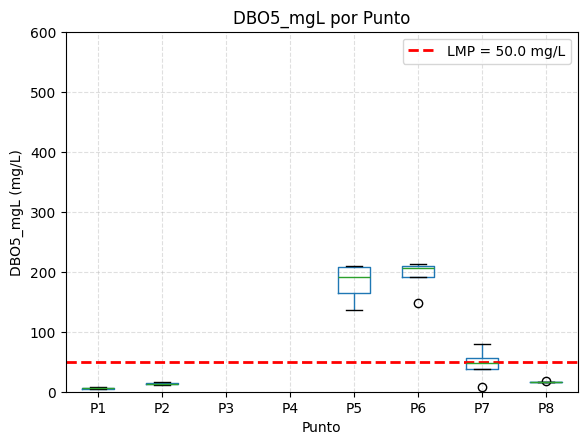

<Figure size 1000x500 with 0 Axes>

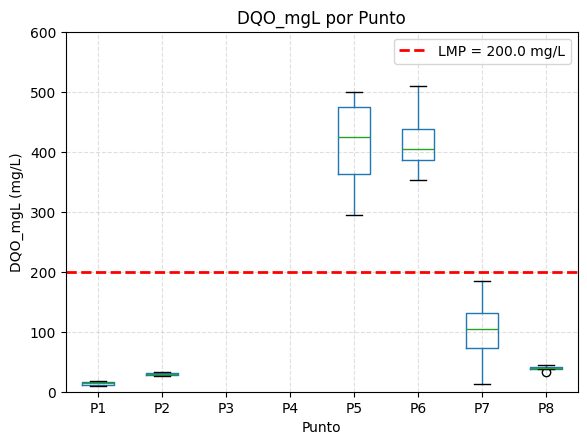

<Figure size 1000x500 with 0 Axes>

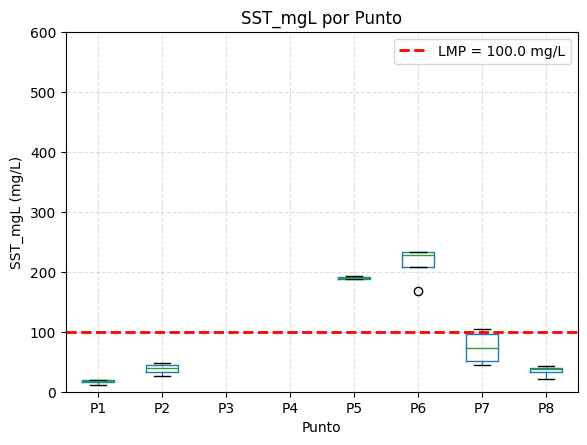

<Figure size 1000x500 with 0 Axes>

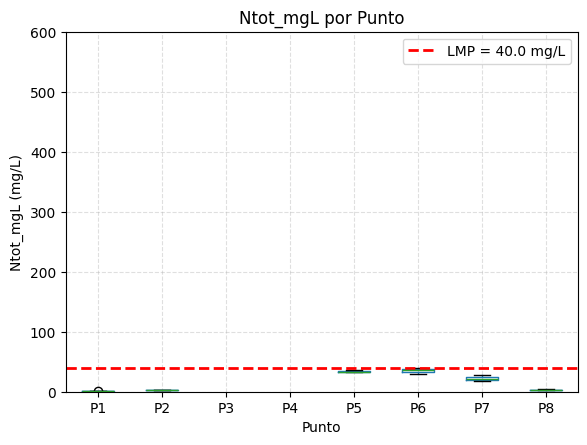

<Figure size 1000x500 with 0 Axes>

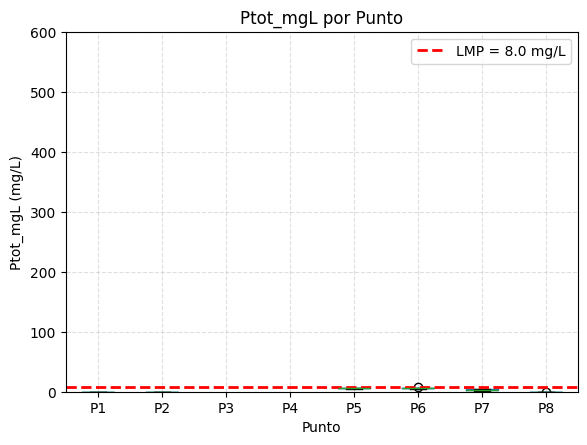

In [ ]:
variables=['DBO5_mgL','DQO_mgL','SST_mgL','Ntot_mgL', 'Ptot_mgL']
for var in variables:
    unidad=lmp["Unidad"][(lmp["Variable"]==var)].values[0]
    limite=lmp["LMP_max"][(lmp["Variable"]==var) & (lmp["TipoSistema"]=="Residual")]
    boxplot_por_punto(df, var, limite, unidad)

# Parte 4